In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\herma\PythonEnvironment\Project3\data_retail.csv', sep=';')

# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime (df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

#Lima data teratas
print(df.head())

print(df.info())

   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 

Churn Customers
transaksi paling terakhir kapan dilakukan
klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.

In [2]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction']<='2018-08-01', 'is_churn'] =  True
df.loc[df['Last_Transaction']>'2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000128
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

In [3]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


Customer acquisition by year
Membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart. Untuk itu buatlah feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction sebelum melakukan visualisasi.

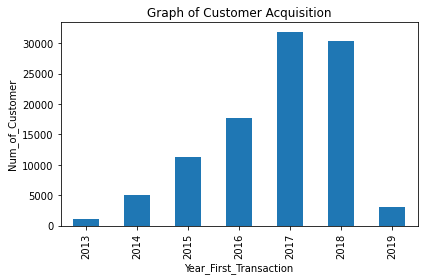

In [4]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Transaction by year

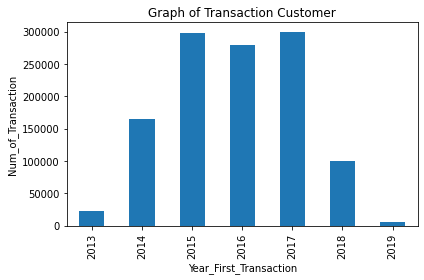

In [5]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Average transaction amount by year
Dengan menggunakan seaborn pointplot, berikut visualisasi tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.

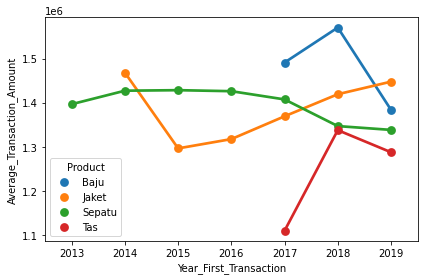

In [6]:
import seaborn as sns 

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

Proporsi churned customer untuk setiap produk
Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart.

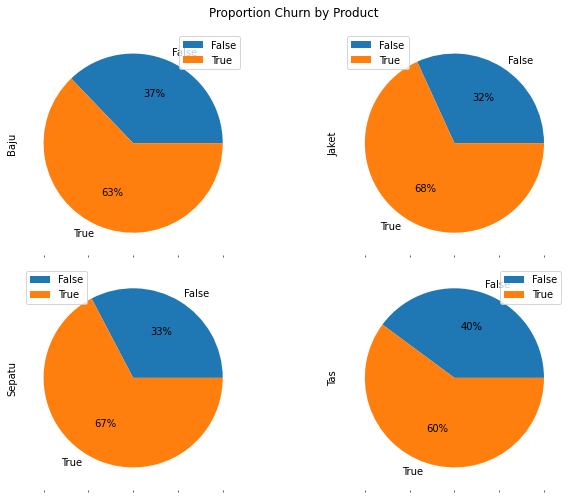

In [7]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartny
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Distribusi kategorisasi count transaction
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel 1. Kategorisasi Jumlah Transaksi

Setelah menambahkan kolom baru untuk kategori ini dengan nama Count_Transaction_Group, berikut visualisasinya:

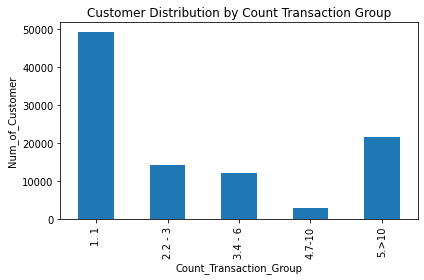

In [8]:
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction']>1 and row['Count_Transaction']<=3):
        val ='2.2 - 3'
    elif (row['Count_Transaction']>3 and row['Count_Transaction']<=6):
        val ='3.4 - 6'
    elif (row['Count_Transaction']>6 and row['Count_Transaction']<=10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Distribusi kategorisasi average transaction amount
Selanjutnya, visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh Tabel 2. Kategorisasi Average Transaction Amount. 

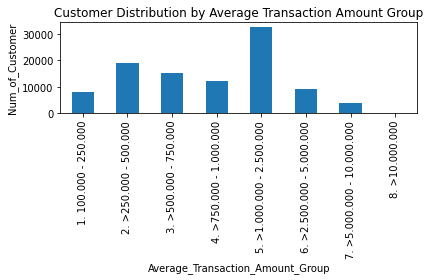

In [9]:
# Kategorisasi rata-rata besar transaksi
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
		val ='1. 100.000 - 250.000'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
		val ='2. >250.000 - 500.000'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
		val ='3. >500.000 - 750.000'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
		val ='4. >750.000 - 1.000.000'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
		val ='5. >1.000.000 - 2.500.000'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
		val ='6. >2.500.000 - 5.000.000'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
		val ='7. >5.000.000 - 10.000.000'
	else:
		val ='8. >10.000.000'
	return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Feature Columns dan Target
Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction dan akan ditambahkan 1 kolom lagi, yaitu Year_Diff.  Assign dataset dengan feature columns ini sebagai variabel independent X. 

Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.


In [10]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 
# Target variable
y = df['is_churn'] 
y = y.astype (str)

Split X dan y ke dalam bagian training dan testing
Setelah variabel independent X dan variabel dependent y selesai dilakukan, X dan y secara berurut akan dimasukkan ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

Train, predict dan evaluate
berikut membuat model menggunakan Logistic Regression. 
Menginisiasi model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.

<Figure size 432x288 with 0 Axes>

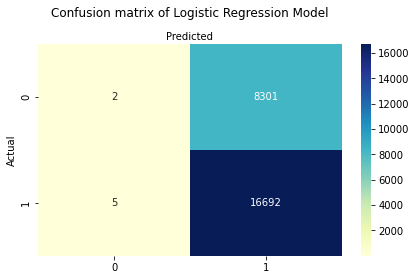

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression ()
logreg.fit(X_train, y_train)

logreg_pred = logreg.predict(X_test)

cnf_matrix = confusion_matrix(y_test, logreg_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix of Logistic Regression Model', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, logreg_pred)
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, logreg_pred))
print('Precision:', precision_score(y_test, logreg_pred, average='micro'))
print('Recall :', recall_score(y_test, logreg_pred, average='micro'))

Accuracy : 0.66776
Precision: 0.66776
Recall : 0.66776


<Figure size 432x288 with 0 Axes>

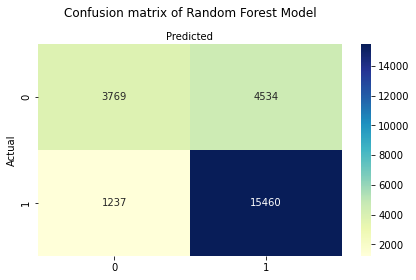

In [14]:
from sklearn.ensemble import RandomForestClassifier
#Fit the Random Forest Classification Model
rforestmodel = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rforestmodel.fit(X_train, y_train)

rforest_pred = rforestmodel.predict(X_test)

cnf_matrix = confusion_matrix(y_test, rforest_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix of Random Forest Model', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [15]:
rforestmodel = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rforestmodel.fit(X_train, y_train)
rforest_pred = rforestmodel.predict(X_test)
cnf_matrix = confusion_matrix(y_test, rforest_pred)
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, rforest_pred))
print('Precision:', precision_score(y_test, rforest_pred, average='micro'))
print('Recall :', recall_score(y_test, rforest_pred, average='micro'))

Accuracy : 0.76916
Precision: 0.76916
Recall : 0.76916
